In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv(r'C:\Users\Alexey\Desktop\GB\Python\hwork\hw14\kc-house-data.csv')
df['price'].round(0)
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062


In [75]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Задание 1.

### 1.2 Изучите стоимости недвижимости

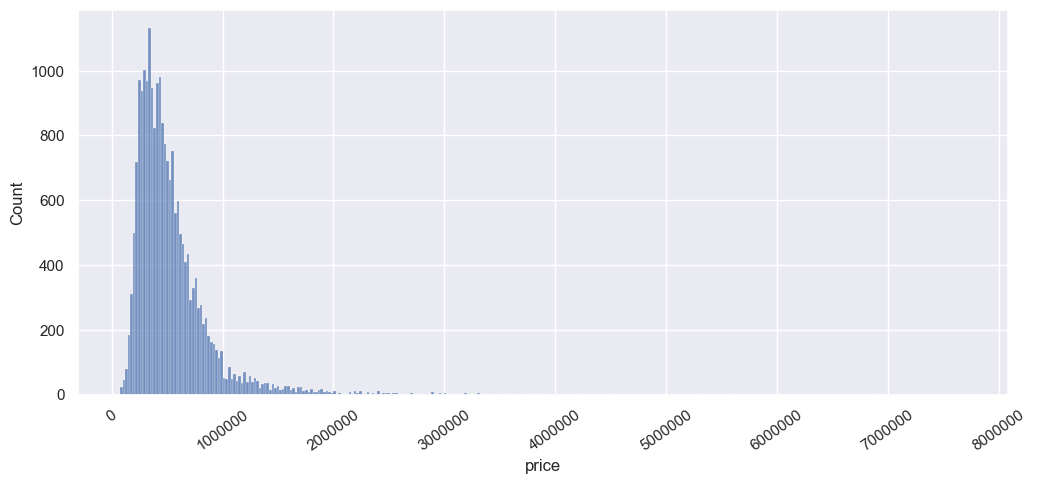

In [67]:
sns.set(rc={"figure.figsize":(12, 5)})
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
plt.xticks(rotation= 35)
sns.histplot(data = df['price']);

### 1.3 Изучите распределение квадратуры жилой площади

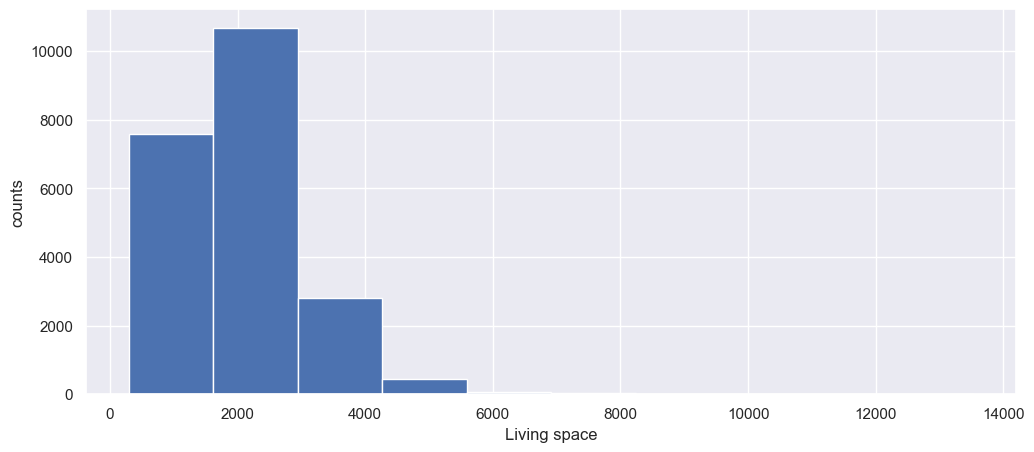

In [68]:
plt.hist(df['sqft_living'])
plt.xlabel('Living space')
plt.ylabel('counts');

### 1.4 Изучите распределение года постройки
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

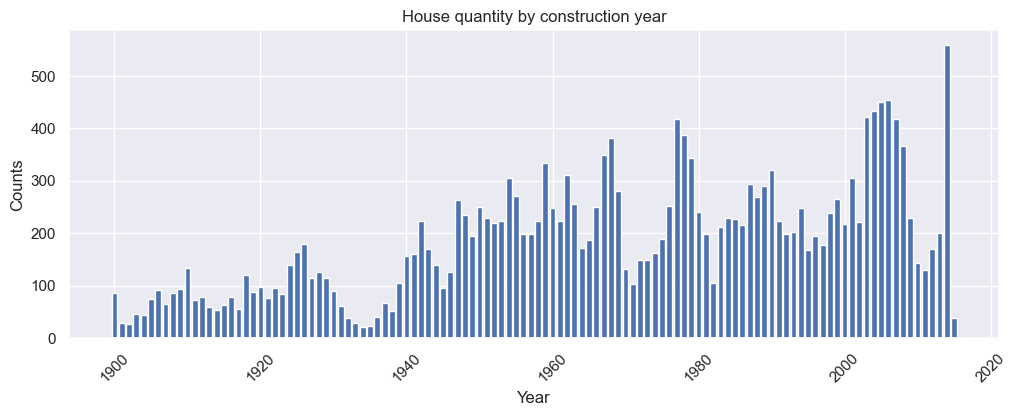

In [83]:
years = df['yr_built'].value_counts().index
years_quantity = df['yr_built'].value_counts().values

plt.figure(figsize=(12,4))
plt.bar(x = years, height = years_quantity)
plt.title('House quantity by construction year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(rotation= 45);

Самые старые дома, информация по которым представлена в датасете, были построены в 1900 году. Далее на протяжении 25 лет их количество увеличивалось относительно линейно до подъёма темпов во второй половине двадцатых.
Даже если не знать, когда в США была Великая Депрессия, по графику строительства домов в Калифорнии легко это отследить - мы видим "яму" в начале 30х годов 20 века.
Что интересно, в период второй Мировой и далее темпы застройки достаточно стабильны как в периоды подъёма, так и в периоды коротких рецессий, таких, как рецессия Эйзенхауэра. Также значительное снижение темпов наблюдается в период мирового топливного/нефтяного кризиса начала 70х.
Самые большой всплеск активности - конец нулевых.

## Задание 2. 
### 2.1 Изучите распределение домов от наличия вида на набережную

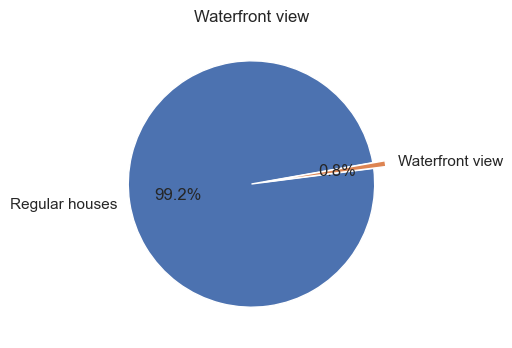

In [114]:
plt.figure(figsize=(4,4))

waterfront = df['waterfront'].value_counts().index
waterfront_values = df['waterfront'].value_counts().values
plt.pie(waterfront_values, 
        labels = ['Regular houses', 'Waterfront view'],
        autopct = '%.1f%%',
        explode = [0, 0.1],
        startangle=10);
plt.title('Waterfront view');

### 2.2 Изучите распределение этажей домов

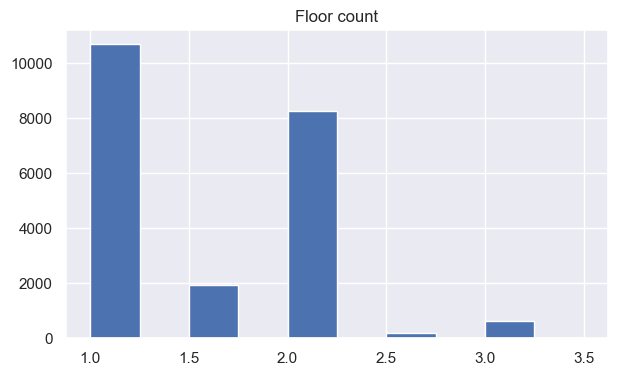

In [92]:
plt.figure(figsize=(7,4))
plt.hist(df['floors']);
plt.title('Floor count');

### 2.3 Изучите распределение состояния домов
* Постройте график
* Сделайте выводы

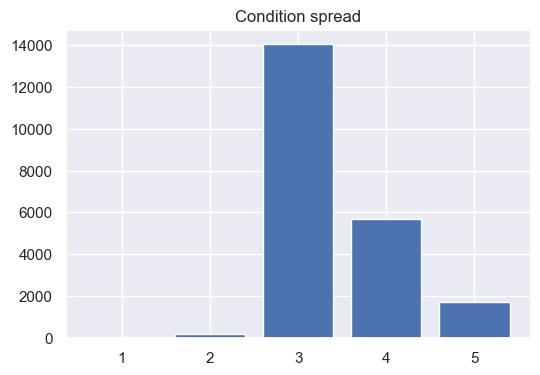

In [96]:
plt.figure(figsize=(6,4))
condition = df['condition'].value_counts().index
condition_values = df['condition'].value_counts().values
plt.bar(x = condition, height = condition_values)
plt.title('Condition spread');

Большая часть домов в удовлетворительном состоянии, меньше в хорошем или отличном, домов в плохом и ужасном состоянии в общей массе крайне мало.

## Задание 3. 
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

##### Вначале для выявления закономерностей во взаимозависимости факторов и цены нам потребуется понять, какие факторы наиболее сильно взаимозависимы с ценой домов.
Попробуем построить матрицу корреляции для признаков.

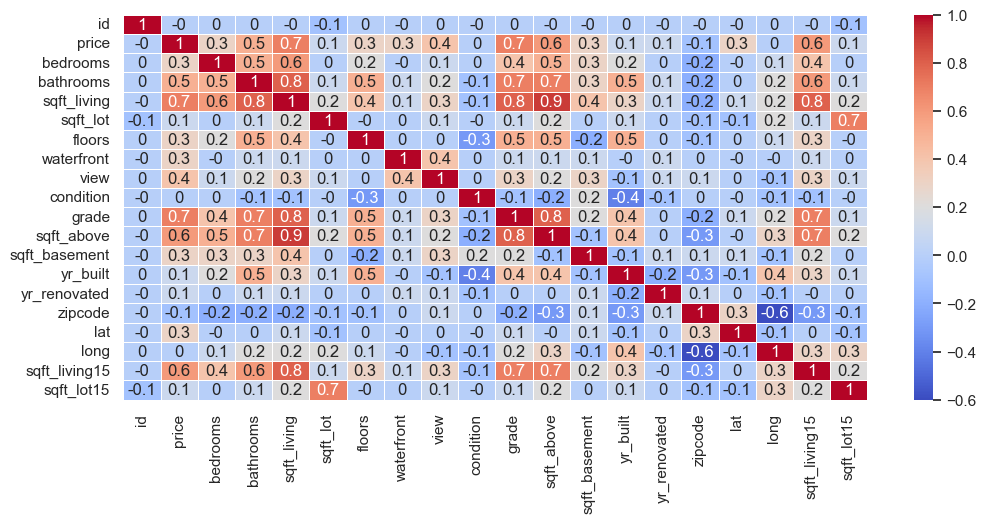

In [116]:
corr_matrix = df.corr(numeric_only = True)
corr_matrix = np.round(corr_matrix, 1)
sns.heatmap(corr_matrix, annot = True, linewidth = 0.5, cmap = 'coolwarm');

##### Ряд признаков с более линейной прямой зависимостью отражен оттенками красного, оттенками синего - с обратной (например, прослеживается, что между годом постройки и состоянием дома есть обратная зависимость).
Но, как можно отметить, не очень удобно, когда визуализированы данные по всему датафрейму, а требуется только зависимость цены от различных факторов.
Более репрезентативной будет диаграмма корреляции исключительно цены с прочими признаками.

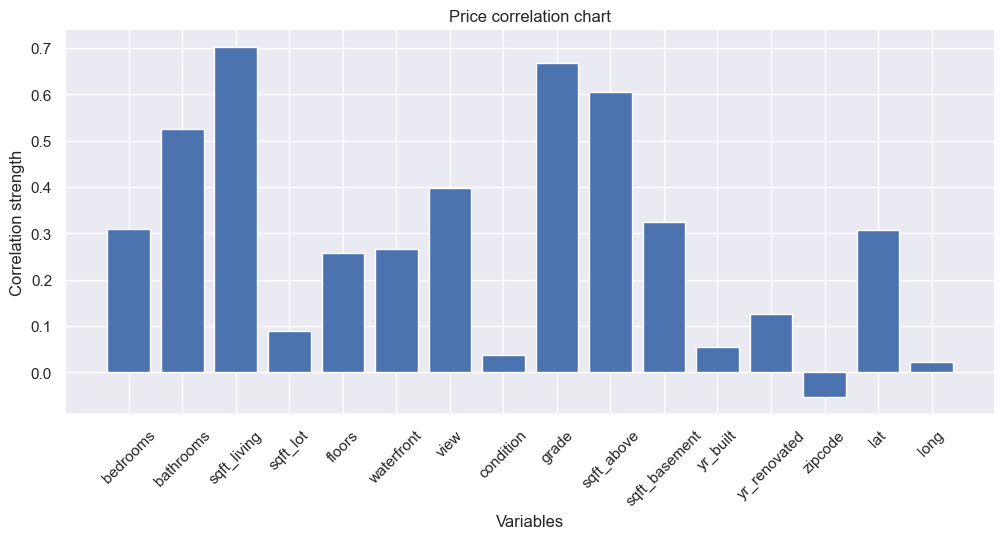

In [147]:
corr_line = df[df.columns[2:]].corr()['price'][:-2] #считаем корреляцию цены с недублирующимися признаками
corr_names = corr_line.index[1:]
corr_values = corr_line.values[1:]

plt.bar(x = corr_names, height = corr_values)       #строим график
plt.xlabel('Variables')
plt.ylabel('Correlation strength')
plt.xticks(rotation= 45);
plt.title('Price correlation chart');

##### Здесь можно отметить, что наиболее линейная зависимость в представленных данных у цены на дома относительно жилой площади, состояния и площади надземной части.
Чуть менее сильная - с количеством ванных комнат и качеством вида из окон.
Поскольку низкая степень зависимости цены от общей площади дома неочевидна, построим график, чтобы убедиться в этом более наглядно.

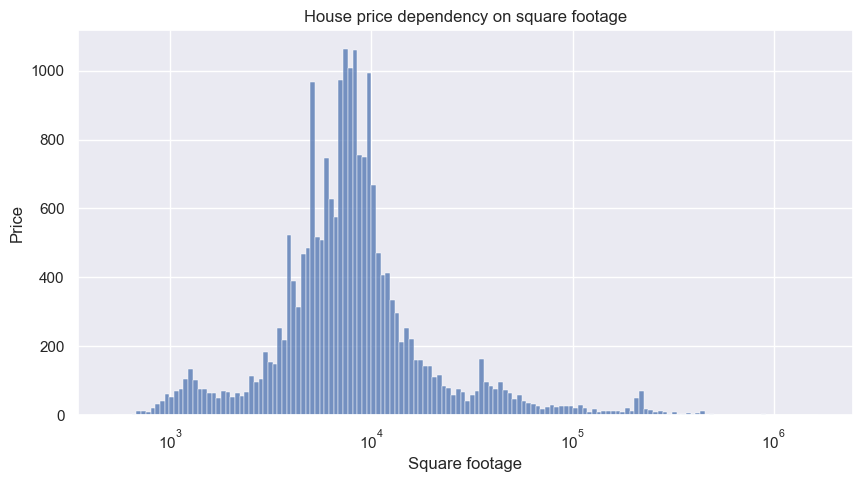

In [145]:
plt.figure(figsize=(10, 5))

sns.histplot(data=df['price'], x=df['sqft_lot'], log_scale=True)

plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('House price dependency on square footage');

##### Действительно, на графике отображено распределение, близкое к нормальному - соответственно, явной линейной зависимости между факторами нет.
Посмотрим, как выражается взаимосвязь цены на дом с его качественной оценкой - для этого воспользуемся диаграммой "ящик с усами". 

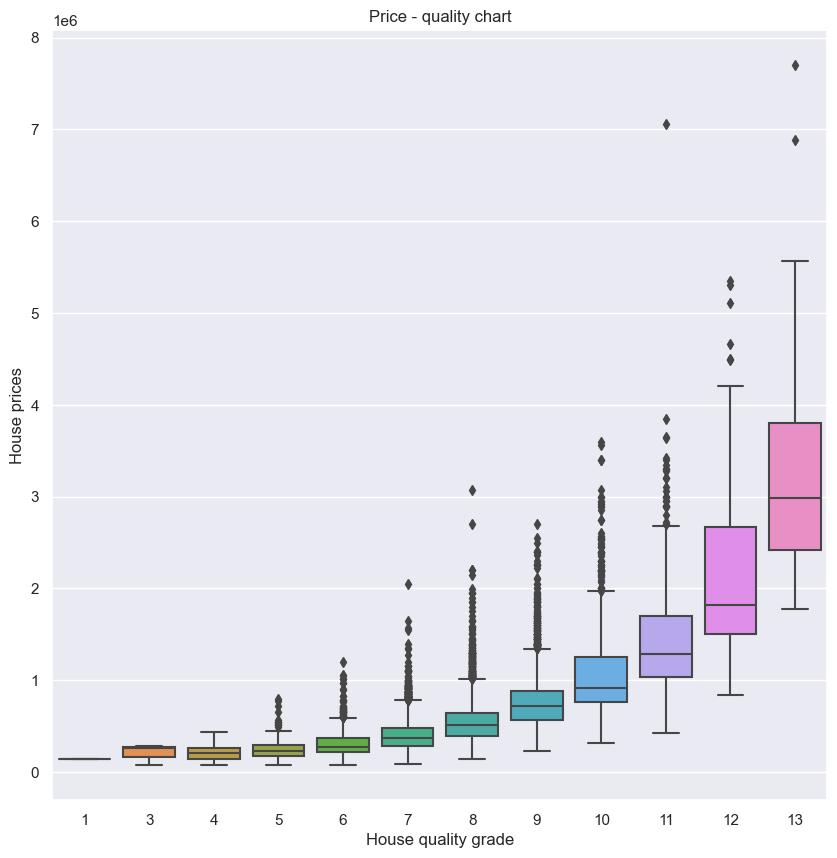

In [163]:
plt.figure(figsize=(10, 10))

sns.boxplot(y=df['price'], x=df['grade'], whis=1.5)
plt.xlabel('House quality grade')
plt.ylabel('House prices')
plt.title('Price - quality chart');

##### Зависимость прямая и экспоненциально растущая в зависимости от качества дома.

Наконец, посмотрим, настолько ли линейна зависимость стоимости дома от количества ванных комнат

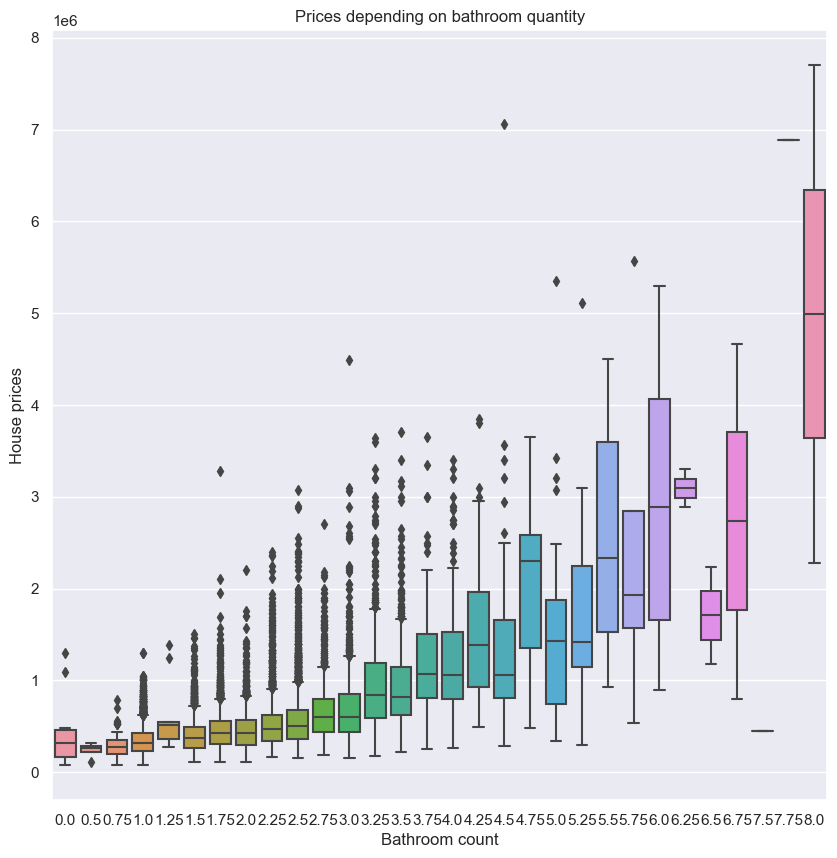

In [166]:
plt.figure(figsize=(10, 10))

sns.boxplot(y=df['price'], x=df['bathrooms'], whis=1)
plt.xlabel('Bathroom count')
plt.ylabel('House prices')
plt.title('Prices depending on bathroom quantity');

##### Для более бюджетного сегмента зависимость достаточно линейная.
Далее, когда количество ванных переваливает за 4, а медианная стоимость за определенный порог, прочие факторы влияют на стоимость дома сильнее, и количество ванных перестает быть точным индикатором его цены.